In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
X = df.drop('sales', axis = 1)
y = df['sales']

In [18]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [49]:
train_RMSE = []
test_RMSE = []

for d in range(1, 10):

    poly = PolynomialFeatures(degree = d, include_bias = False)
    p_feat = poly.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(p_feat, y, test_size = 0.3, random_state = 101)
    model = LinearRegression().fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    train_RMSE.append(np.sqrt(mean_squared_error(y_train, train_pred)))
    test_RMSE.append(np.sqrt(mean_squared_error(y_test, test_pred)))
    
best_d_train = train_RMSE.index(min(train_RMSE)) + 1
best_d_test = test_RMSE.index(min(test_RMSE)) + 1

print(best_d_train, best_d_test)
    

8 4


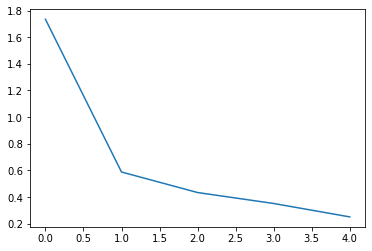

In [58]:
plt.plot(train_RMSE[:5])

In [66]:
final_poly = PolynomialFeatures(degree = best_d_test, include_bias = False)

In [67]:
final_p_feat = final_poly.fit_transform(X)

In [68]:
final_model = LinearRegression().fit(final_p_feat, y)

In [70]:
y_hat = final_model.predict(final_p_feat)

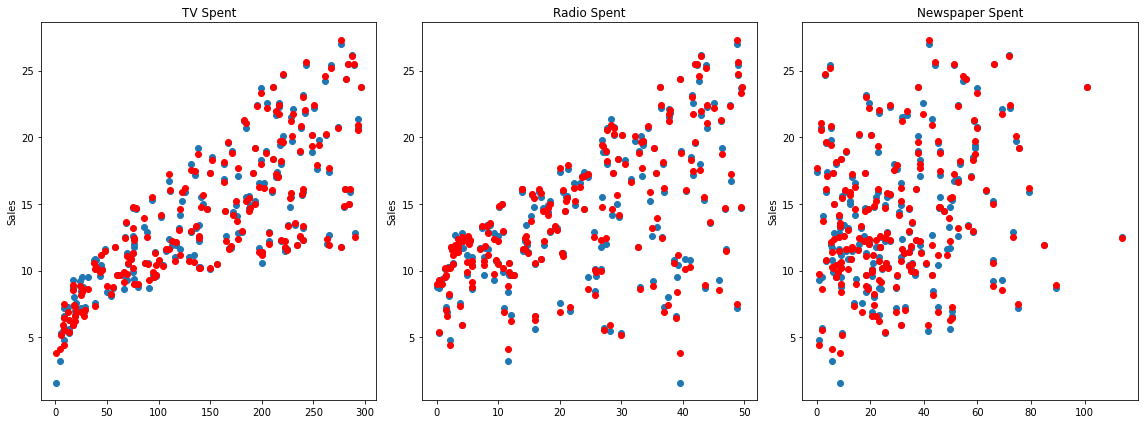

In [71]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16, 6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].plot(df['TV'], y_hat, 'o', color = 'red')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spent")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].plot(df['radio'], y_hat, 'o', color = 'red')
axes[1].set_title("Radio Spent")
axes[1].set_ylabel("Sales")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].plot(df['newspaper'], y_hat, 'o', color = 'red')
axes[2].set_title("Newspaper Spent");
axes[2].set_ylabel("Sales")

plt.tight_layout();

In [75]:
from joblib import dump, load
dump(final_model, 'final_sales_model_poly.joblib')
dump(final_poly, 'final_poly.joblib')

['final_poly.joblib']

In [81]:
load_poly = load('final_poly.joblib')
load_model = load('final_sales_model_poly.joblib')

In [79]:
test = [[149, 22, 12]]

In [83]:
p = load_poly.fit_transform(test)
load_model.predict(p)

array([14.35795571])